# Testing Inter Mapping Algorithms

* Integer mapping from the period of the PRNG to a specified interval $[x_{min}, x_{max}]$
  * Is it biased?


In [4]:
import gfort2py as gf
import os
import numpy as np
import matplotlib.pyplot as plt

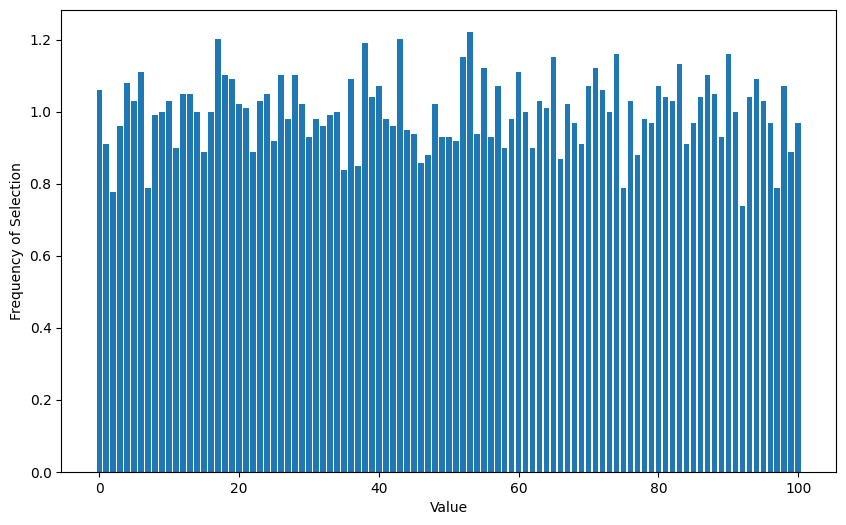

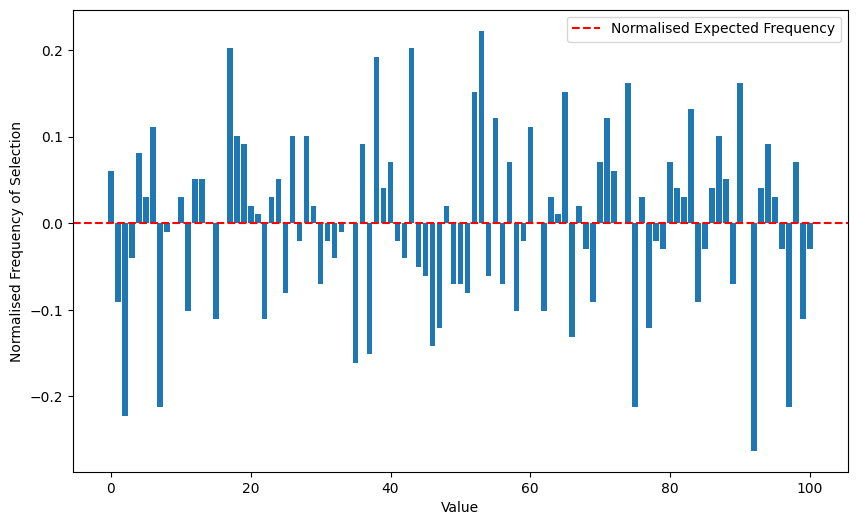

In [5]:
""" Test integer mapping
"""
integer_mapping_m = gf.fFort('../cmake-build/libfortran_rand.dylib', '../cmake-build/modules/integer_mapping_m.mod')

x_min = 0
x_max = 100
n_numbers = x_max - x_min + 1
n_repeat = 10000

random_numbers = np.zeros(shape=n_numbers)
seed = int.from_bytes(os.urandom(16), 'big') 

for i in range(0, n_repeat):
    results = integer_mapping_m.random_integer_int32(x_min, x_max, seed)
    r = results.result
    random_numbers[r] += 1
    seed = results.args['seed']

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), (random_numbers *  n_numbers) / n_repeat)
plt.xlabel('Value')
plt.ylabel('Frequency of Selection')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), ((random_numbers *  n_numbers) / n_repeat) - 1)
plt.xlabel('Value')
plt.ylabel('Normalised Frequency of Selection')
plt.axhline(y=0.0, color='r', linestyle='--', label=f'Normalised Expected Frequency') 
plt.legend()
plt.show()


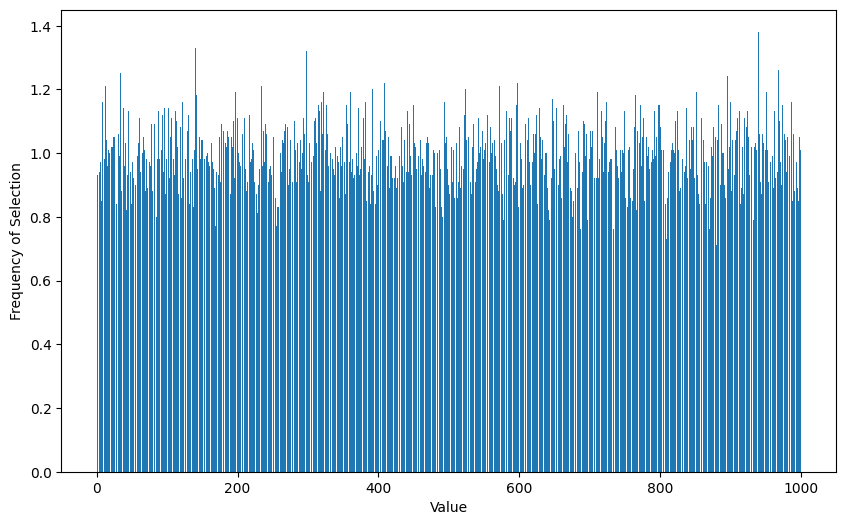

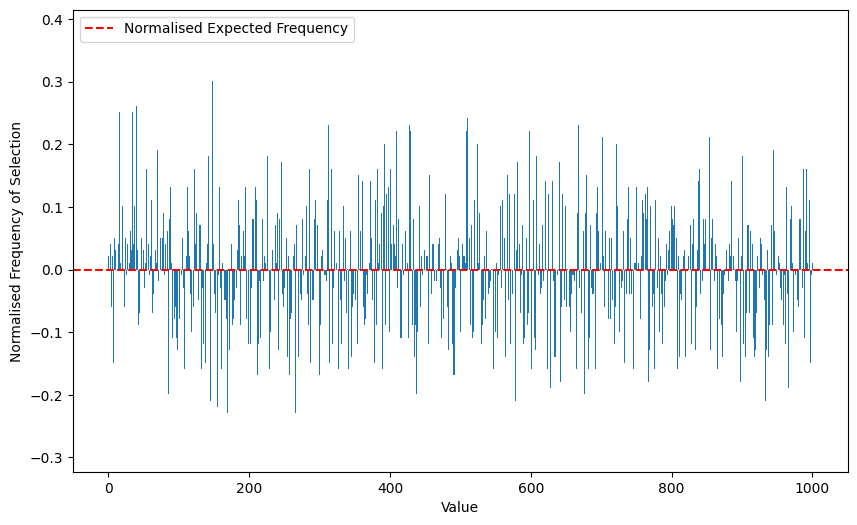

In [6]:
""" Test integer mapping, but for a large range 
"""
x_min = 0
x_max = 1000
n_numbers = x_max - x_min + 1
n_repeat = 100000

random_numbers = np.zeros(shape=n_numbers)
seed = int.from_bytes(os.urandom(16), 'big') 

for i in range(0, n_repeat):
    results = integer_mapping_m.random_integer_int32(x_min, x_max, seed)
    r = results.result
    random_numbers[r] += 1
    seed = results.args['seed']

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), (random_numbers *  n_numbers) / n_repeat)
plt.xlabel('Value')
plt.ylabel('Frequency of Selection')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), ((random_numbers *  n_numbers) / n_repeat) - 1)
plt.xlabel('Value')
plt.axhline(y=0.0, color='r', linestyle='--', label=f'Normalised Expected Frequency') 
plt.legend()
plt.ylabel('Normalised Frequency of Selection')
plt.show()